# Table of Contents
* [Filtering](#Filtering)
	* [Filter out dangling ends and self-circles](#Filter-out-dangling-ends-and-self-circles)
	* [Apply filters on the data](#Apply-filters-on-the-data)
		* [Evaluate changes](#Evaluate-changes)


# Filtering

## Filter out dangling ends and self-circles

In [1]:
from pytadbit.mapping.filter import filter_reads

In [5]:
r_enz = 'HindIII'

The `max_molecule_length` parameter used to filter-out pseudo-dangling-ends can be extracted from the previous section in the computation of insert size.

The `min_distance_to_re`, that affects the detection of random breaks, should be a bit larger in order to contain almost all the fragments.

In [6]:
# this will last ~10 minutes
masked = filter_reads(
    'results/fragment/{0}/03_filtering/reads12_{0}.tsv'.format(r_enz), 
    max_molecule_length=750, over_represented=0.005, max_frag_size=100000, 
    min_frag_size=100, re_proximity=5, min_dist_to_re=1000)

Filtered reads (and percentage of total):

     Mapped both                :     13706641 (100.00%)
  -----------------------------------------------------
   1- self-circle               :        37367 (  0.27%)
   2- dangling-end              :       659487 (  4.81%)
   3- error                     :        37387 (  0.27%)
   4- extra dangling-end        :      3773374 ( 27.53%)
   5- too close from RES        :      3277165 ( 23.91%)
   6- too short                 :       296844 (  2.17%)
   7- too large                 :         1842 (  0.01%)
   8- over-represented          :       409496 (  2.99%)
   9- duplicated                :       324435 (  2.37%)
  10- random breaks             :       703019 (  5.13%)


This generates a dictionary with the different filters and the reads affected by each.

The filters are:
1. **self-circle**: reads are coming from a single RE fragment and point to the outside (—-<===—===>—)
2. **dangling-end**: reads are coming from a single RE fragment and point to the inside (—-===>—<===—)
3. **error**: reads are coming from a single RE fragment and point in the same direction
4. **extra dangling-end**: reads are coming from different RE fragment but are close enough (< Maximum molecule length) and point to the inside. Maximum molecule length parameter depends on the size of the sequenced fragments.
5. **too close from REs**: semi-dangling-end filter, start position of one of the read is too close (5 bp by default) from RE cutting site (with 4 base-pair-cutter enzyme it can be set to 4 nt). This filter is in general not taken into account in in-situ Hi-C experiments, and with 4bp cutters as the ligation may happen only one side of the DNA fragments.
6. **too short**: remove reads coming from small restriction less than 100 bp (default) because they are comparable to the read length, and are thus probably artifacts.
7. **too large**: remove reads coming from large restriction fragments (default: 100 Kb, P < 10-5 to occur in a randomized genome) as they likely represent poorly assembled or repeated regions
8. **over-represented**: reads coming from the top 0.5% most frequently detected restriction fragments, they may be prone to PCR artifacts or represent fragile regions of the genome or genome assembly errors
9. **duplicated**: the combination of the start positions (and direction) of the reads is repeated -> PCR artifact (only keep one copy)
10. **random breaks**: start position of one of the read is too far (more than Minimum distance to RE site) from RE cutting site. Non-canonical enzyme activity or random physical breakage of the chromatin.



## Apply filters on the data

In [7]:
from pytadbit.mapping.filter import apply_filter

apply_filter('results/fragment/{0}/03_filtering/reads12_{0}.tsv'.format(r_enz), 
             'results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), masked, 
             filters=[1, 2, 3, 4, 9, 10])

    saving to file 8626149 reads without .


8626149

### Evaluate changes

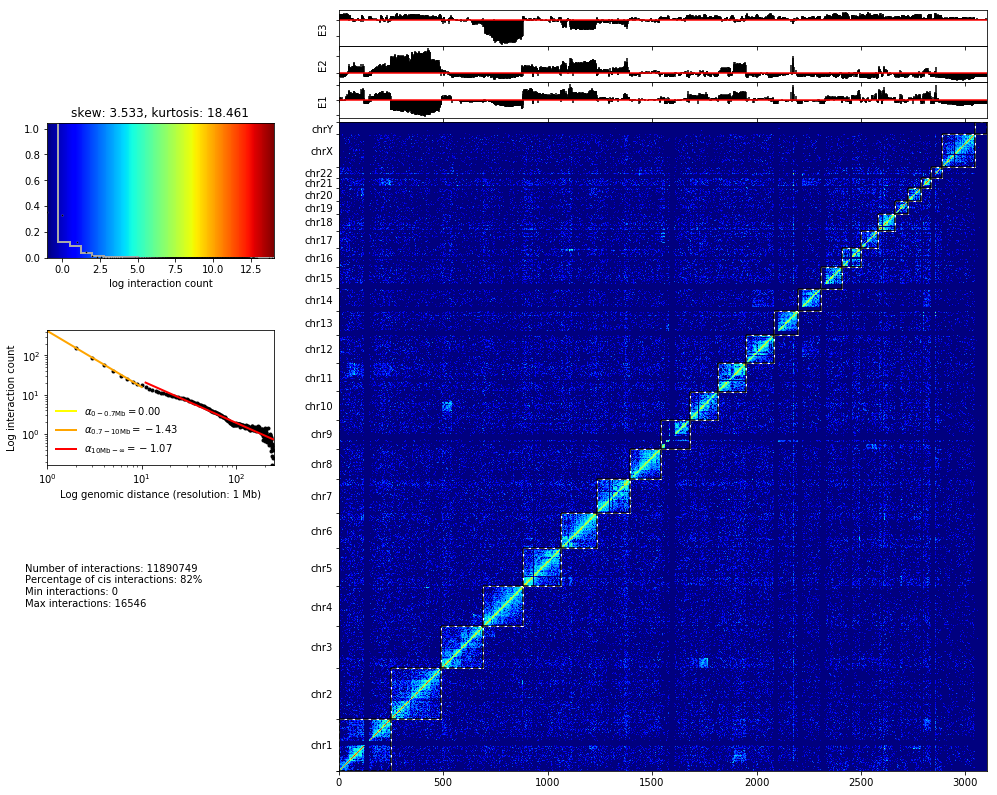

In [8]:
from pytadbit.mapping.analyze import hic_map

hic_map('results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), 
        resolution=1000000, show=True)

Zoom to a single chromosome or a region:

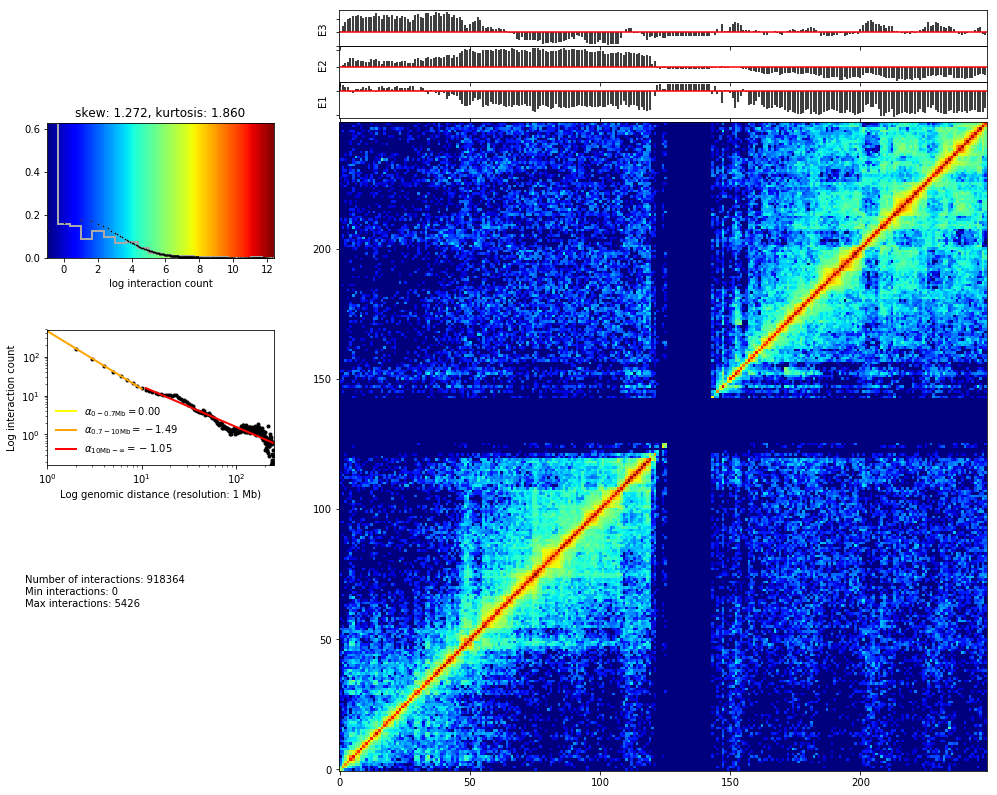

In [10]:
hic_map('results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), 
        resolution=1000000, show=True, focus='chr1')

In [ ]:
hic_map('results/fragment/{0}/03_filtering/valid_reads12_{0}.tsv'.format(r_enz), 
        resolution=1000000, show=True, focus=(500, 1000))